In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.metrics import mean_squared_error 

%matplotlib inline 
from pandas.plotting import lag_plot, autocorrelation_plot 
 
# from statsmodels.tsa.seasonal import seasonal_decompose 

In [2]:
min_tmp = pd.read_csv('../Datasets/daily-min-temperatures.csv', header=0, parse_dates=[0]) 
min_tmp 

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
min_tmp.shape 

(3650, 2)

In [4]:
min_tmp.shape[0] 

3650

Test and Train split - 

In [5]:
input_size = int(min_tmp.shape[0] * 0.8) 
input_size 

2920

In [6]:
train = min_tmp[0:input_size] 
train 

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
2915,1988-12-26,9.5
2916,1988-12-27,12.9
2917,1988-12-28,12.9
2918,1988-12-29,14.8


In [7]:
train.shape 

(2920, 2)

In [8]:
test = min_tmp[input_size:] 
test 

,Date,Temp
2920,1989-01-01,14.3
2921,1989-01-02,17.4
2922,1989-01-03,18.5
2923,1989-01-04,16.8
2924,1989-01-05,11.5
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [9]:
test.shape 

(730, 2)

In [10]:
min_tmp['t'] = min_tmp['Temp'].shift(1)        # Temp is the y-variable, and t is the x-variable 
min_tmp 

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
...,...,...,...
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5


In [11]:
train, test = min_tmp[1: (min_tmp.shape[0]-7)], min_tmp[(min_tmp.shape[0]-7):]  

In [12]:
train 

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8
...,...,...,...
3638,1990-12-20,15.4,14.7
3639,1990-12-21,13.1,15.4
3640,1990-12-22,13.2,13.1
3641,1990-12-23,13.9,13.2


In [13]:
test 

,Date,Temp,t
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5
3649,1990-12-31,13.0,15.7


In [14]:
train_X, train_y, test_X, test_y = train['t'], train['Temp'], test['t'], test['Temp'] 

In [15]:
print(f" X_train size : {train_X.shape} \n X_test size : {test_X.shape} \n y_train size : {train_y.shape} \n y_test size : {test_y.shape}") 
print(f" X_train : {train_X} \n X_test : {test_X} \n y_train : {train_y} \n y_test : {test_y}") 

 X_train size : (3642,) 
 X_test size : (7,) 
 y_train size : (3642,) 
 y_test size : (7,)
 X_train : 1       20.7
2       17.9
3       18.8
4       14.6
5       15.8
        ... 
3638    14.7
3639    15.4
3640    13.1
3641    13.2
3642    13.9
Name: t, Length: 3642, dtype: float64 
 X_test : 3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64 
 y_train : 1       17.9
2       18.8
3       14.6
4       15.8
5       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: Temp, Length: 3642, dtype: float64 
 y_test : 3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


# Walk-Forward Validation -  
(Naive) It tells whether our data is a random walk or not.  

In [16]:
preds = test_X.copy() 
preds 

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [17]:
test_y 

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [18]:
mse_train = mean_squared_error(train_y, train_X) 
mse_test = mean_squared_error(test_y, preds) 

print(f"Mean Squared Error (Train) : {mse_train}") 
print(f"Mean Squared Error (Test) : {mse_test}") 

Mean Squared Error (Train) : 7.467207578253706
Mean Squared Error (Test) : 3.4228571428571413


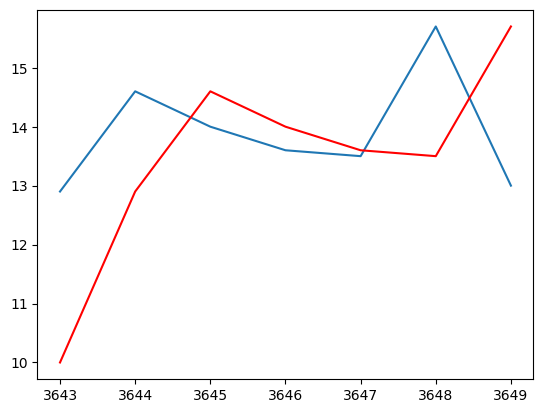

In [19]:
plt.plot(test_y) 
plt.plot(preds, color='red') 